# データフレームのマージ

通常のKeyを用いたデータのマージ方法の記載をする

In [13]:
import numpy as np
import pandas as pd
from pandas import DataFrame , Series

In [9]:
dframe1 = DataFrame({'key':['x','z','y','z','x','y'], 'dataset_1':np.arange(6)})

In [10]:
dframe1

,key,dataset_1
0,x,0
1,z,1
2,y,2
3,z,3
4,x,4
5,y,5


In [11]:
dframe2 = DataFrame({'key' : ['q','y','z'], 'data_set_2':[1,2,5]})
dframe2

,key,data_set_2
0,q,1
1,y,2
2,z,5


In [12]:
# データのマージ 何も指定がない場合、同じIndexのkeyをもとにマージを行う
pd.merge(dframe1,dframe2)

,key,dataset_1,data_set_2
0,z,1,5
1,z,3,5
2,y,2,2
3,y,5,2


In [13]:
# マージするKeyの指定
pd.merge(dframe1,dframe2,on='key')

,key,dataset_1,data_set_2
0,z,1,5
1,z,3,5
2,y,2,2
3,y,5,2


In [14]:
# マージ方法の指定は「how」を使用 leftであれば左側のdframe1を基準とする dframe2で指定したければ'right'にすればよい
pd.merge(dframe1,dframe2,on='key', how='left') #dframe1基準

,key,dataset_1,data_set_2
0,x,0,NaN
1,z,1,5.0
2,y,2,2.0
3,z,3,5.0
4,x,4,NaN
5,y,5,2.0


In [15]:
pd.merge(dframe1,dframe2,on='key', how='right') #dframe2基準

,key,dataset_1,data_set_2
0,q,NaN,1
1,y,2.0,2
2,y,5.0,2
3,z,1.0,5
4,z,3.0,5


In [16]:
# 今度は多対多
# 両方のDataFrameで、keyに関して複数の行がある。
dframe3 = DataFrame({'key': ['X', 'X', 'X', 'Y', 'Z', 'Z'],
                 'data_set_3': range(6)})
dframe4 = DataFrame({'key': ['Y', 'Y', 'X', 'X', 'Z'],
                 'data_set_4': range(5)})
#マージする。Xに対応するデータが片方は2個、片方は３個あるので、2*3=6個のデータが出力される
pd.merge(dframe3, dframe4)

,key,data_set_3,data_set_4
0,X,0,2
1,X,0,3
2,X,1,2
3,X,1,3
4,X,2,2
5,X,2,3
6,Y,3,0
7,Y,3,1
8,Z,4,4
9,Z,5,4


In [17]:
# キーでのマージ手法
df_left = DataFrame({'key1': ['SF', 'SF', 'LA'],
                  'key2': ['one', 'two', 'one'],
                  'left_data': [10,20,30]})
df_left

,key1,key2,left_data
0,SF,one,10
1,SF,two,20
2,LA,one,30


In [18]:
df_right = DataFrame({'key1': ['SF', 'SF', 'LA', 'LA'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'right_data': [40,50,60,70]})
df_right

,key1,key2,right_data
0,SF,one,40
1,SF,one,50
2,LA,one,60
3,LA,two,70


In [19]:
# キーでのマージ onでKeyを指定することでキーでのマージが可能 
pd.merge(df_left, df_right, on=['key1', 'key2'], how='outer')

,key1,key2,left_data,right_data
0,SF,one,10.0,40.0
1,SF,one,10.0,50.0
2,SF,two,20.0,NaN
3,LA,one,30.0,60.0
4,LA,two,NaN,70.0


In [20]:
# マージ時にキーが重複している場合、接頭辞がくっつく
# 追加する文字列を指定することが可能
pd.merge(df_left,df_right, on='key1',suffixes=('_lefty','_righty'))

,key1,key2_lefty,left_data,key2_righty,right_data
0,SF,one,10,one,40
1,SF,one,10,one,50
2,SF,two,20,one,40
3,SF,two,20,one,50
4,LA,one,30,one,60
5,LA,one,30,two,70


# Indexを使ったマージ

Indexを使ったマージ方法の記載

In [21]:
import pandas as pd 
import numpy as np 
from pandas import DataFrame

In [22]:
df_left = DataFrame({'key':['X','Y','Z','X','Y'],'data':range(5)})
df_left

,key,data
0,X,0
1,Y,1
2,Z,2
3,X,3
4,Y,4


In [23]:
df_right = DataFrame({'group_data':[10,20]},index=['X','Y'])
df_right

,group_data
X,10
Y,20


In [24]:
# 通常のIndexを使ったマージ
pd.merge(df_left,df_right,left_on='key',right_index=True)

,key,data,group_data
0,X,0,10
3,X,3,10
1,Y,1,20
4,Y,4,20


In [25]:
# 通常のIndexを使ったマージ outer使用
pd.merge(df_left,df_right,left_on='key',right_index=True, how="outer")

,key,data,group_data
0,X,0,10.0
3,X,3,10.0
1,Y,1,20.0
4,Y,4,20.0
2,Z,2,NaN


In [26]:
# 階層的なIndexのマージ
df_left_hr = DataFrame({'key1': ['SF','SF','SF','LA','LA'],
                   'key2': [10, 20, 30, 20, 30],
                   'data_set': np.arange(5.)})
df_right_hr = DataFrame(np.arange(10).reshape((5, 2)),
                   index=[['LA','LA','SF','SF','SF'],
                          [20, 10, 10, 10, 20]],
                   columns=['col_1', 'col_2'])

In [27]:
df_left_hr

,key1,key2,data_set
0,SF,10,0.0
1,SF,20,1.0
2,SF,30,2.0
3,LA,20,3.0
4,LA,30,4.0


In [28]:
df_right_hr

col_1  col_2
LA 20      0      1
   10      2      3
SF 10      4      5
   10      6      7
   20      8      9

In [29]:
# key1/key2でマージを行う
pd.merge(df_left_hr,df_right_hr,left_on=['key1','key2'],right_index=True)


,key1,key2,data_set,col_1,col_2
0,SF,10,0.0,4,5
0,SF,10,0.0,6,7
1,SF,20,1.0,8,9
3,LA,20,3.0,0,1


In [30]:
# joinメソッドでもマージ可能 join: 加える
df_left.join(df_right)


,key,data,group_data
0,X,0,NaN
1,Y,1,NaN
2,Z,2,NaN
3,X,3,NaN
4,Y,4,NaN


# データの連結

numpyはnp.concatinateで可能。pandasはconcatで使用する

In [3]:
# 単純な連結
arr1 = np.arange(9).reshape((3,3))
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [4]:
# 行方向（axis=0）
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [7]:
# pandaでの連結
ser1 =  Series([0,1,2],index=['T','U','V'])
ser2 = Series([3,4],index=['X','Y'])
# concatで、デフォルトは axis=0
pd.concat([ser1,ser2,ser1])

T    0
U    1
V    2
X    3
Y    4
T    0
U    1
V    2
dtype: int64

In [10]:
# DataFrame版 
dframe1 = DataFrame(np.random.randn(4,3), columns=['X', 'Y', 'Z'])
dframe2 = DataFrame(np.random.randn(3, 3), columns=['Y', 'Q', 'X'])
pd.concat([dframe1,dframe2]) #Indexが1-3が繰り返されるようなものが作成される

,X,Y,Z,Q
0,-0.350497,0.585344,-0.523935,NaN
1,1.413601,0.943389,0.795632,NaN
2,-0.607188,1.130589,-0.453168,NaN
3,0.105427,0.248677,1.014015,NaN
0,0.166073,0.042529,NaN,-2.084227
1,-2.532674,-0.926835,NaN,1.710323
2,0.987354,0.317710,NaN,-1.535718


In [12]:
# Indexが繰り返ししないようにするパターン Index無視のオプションを有効かする
pd.concat([dframe1,dframe2],ignore_index=True)

,X,Y,Z,Q
0,-0.350497,0.585344,-0.523935,NaN
1,1.413601,0.943389,0.795632,NaN
2,-0.607188,1.130589,-0.453168,NaN
3,0.105427,0.248677,1.014015,NaN
4,0.166073,0.042529,NaN,-2.084227
5,-2.532674,-0.926835,NaN,1.710323
6,0.987354,0.317710,NaN,-1.535718


# データ組み合わせ

別のテーブル同士でNan値を埋め合わせる方法を記載する

In [13]:
# 組み合わせ用のデータ定義
ser1 = Series([2,np.nan,4,np.nan,6,np.nan],
           index=['Q','R','S','T','U','V'])
ser2 = Series(np.arange(len(ser1), dtype=np.float64),
           index=['Q','R','S','T','U','V'])

In [15]:
ser1

Q    2.0
R    NaN
S    4.0
T    NaN
U    6.0
V    NaN
dtype: float64

In [16]:
ser2

Q    0.0
R    1.0
S    2.0
T    3.0
U    4.0
V    5.0
dtype: float64

In [18]:
# np.where(条件, True時のデータ, False時のデータ)でデータを抽出する
np.where(pd.isnull(ser1),ser2,ser1)

array([2., 1., 4., 3., 6., 5.])

In [19]:
# 上述で抽出したデータをpandasのSeriesに入れ込む indexはser1を参照する
Series(np.where(pd.isnull(ser1),ser2,ser1),index=ser1.index)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [20]:
# NULL値を別テーブルの値に置き換える手法2
ser1.combine_first(ser2)

Q    2.0
R    1.0
S    4.0
T    3.0
U    6.0
V    5.0
dtype: float64

In [21]:
# DataFrame版
dframe_odds = DataFrame({'X': [1., np.nan, 3., np.nan],
                     'Y': [np.nan, 5., np.nan, 7.],
                     'Z': [np.nan, 9., np.nan, 11.]})
dframe_evens = DataFrame({'X': [2., 4., np.nan, 6., 8.],
                     'Y': [np.nan, 10., 12., 14., 16.]})

In [22]:
dframe_odds

,X,Y,Z
0,1.0,NaN,NaN
1,NaN,5.0,9.0
2,3.0,NaN,NaN
3,NaN,7.0,11.0


In [23]:
dframe_evens

,X,Y
0,2.0,NaN
1,4.0,10.0
2,NaN,12.0
3,6.0,14.0
4,8.0,16.0


In [24]:
# Nan値の場合はeven値として埋め込む どちらのテーブルにもない場合はそのままになる
dframe_odds.combine_first(dframe_evens)

,X,Y,Z
0,1.0,NaN,NaN
1,4.0,5.0,9.0
2,3.0,12.0,NaN
3,6.0,7.0,11.0
4,8.0,16.0,NaN


# Series/DataFrameの変換

stack()/unstack()メソッドで可能。デフォルトではNULL値は省かれる

In [25]:
# サンプル dframe
dframe1 = DataFrame(np.arange(8).reshape((2, 4)),
                 index=pd.Index(['LA', 'SF'], name='city'),
                 columns=pd.Index(['A', 'B', 'C','D'], name='letter'))
dframe1

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


In [28]:
# DataFrame -> Series
ser1 = dframe1.stack()
ser1

city  letter
LA    A         0
      B         1
      C         2
      D         3
SF    A         4
      B         5
      C         6
      D         7
dtype: int64

In [29]:
# Series -> DataFrame
ser1.unstack()

letter,A,B,C,D
city,,,,
LA,0,1,2,3
SF,4,5,6,7


# ピボットテーブルの作成

ピボットテーブル : データの可視化+要約するための機能

In [31]:
import pandas._testing as tm #util.testingは古いので、_testingを使用する
tm.N = 3

# ピボットテーブル用のデータ作成用関数 frameで渡されたリストデータに対し、値や変数、時刻データを付与する
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return DataFrame(data, columns=['date', 'variable', 'value'])

# DataFrameを作ります。
dframe = unpivot(tm.makeTimeDataFrame()) #

In [32]:
dframe

,date,variable,value
0,2000-01-03,A,0.791211
1,2000-01-04,A,-0.203383
2,2000-01-05,A,-0.669321
3,2000-01-06,A,0.040123
4,2000-01-07,A,0.385969
...,...,...,...
115,2000-02-07,D,1.272859
116,2000-02-08,D,-0.143382
117,2000-02-09,D,0.416406
118,2000-02-10,D,-1.414004


In [33]:
# ピボットテーブルの作成 渡されたindexに対応する情報が表として出力される
dframe_piv = dframe.pivot('date','variable','value')
dframe_piv

variable,A,B,C,D
date,,,,
2000-01-03,0.791211,0.111182,-1.725416,0.314261
2000-01-04,-0.203383,-0.532726,0.437289,0.397910
2000-01-05,-0.669321,-1.828719,0.357636,0.774603
2000-01-06,0.040123,0.647946,-0.464518,-1.211659
2000-01-07,0.385969,-0.833951,-0.506783,-0.096547
2000-01-10,-1.154719,-0.120834,0.319718,-0.452223
2000-01-11,-1.053106,-0.907667,1.810428,0.487757
2000-01-12,-1.207276,0.738397,-1.453489,-0.451119
2000-01-13,1.178105,-0.426193,-1.654088,0.522066


# 重複したデータの処理

重複したデータを調べたい場合はDataFrame.duplicated()を用いて重複しているデータの有無の真理表を作成、
添え字に指定してあげればよい

In [3]:
# 重複したデータの用意
dframe = DataFrame({'key1': ['A'] * 2 + ['B'] * 3,
                  'key2': [2, 2, 2, 3, 3]})
dframe

,key1,key2
0,A,2
1,A,2
2,B,2
3,B,3
4,B,3


In [4]:
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [5]:
# 重複しているデータの削除 デフォルトは完全一致
dframe.drop_duplicates()

,key1,key2
0,A,2
2,B,2
3,B,3


In [7]:
# 重複しているデータの削除 Key指定のパターン
dframe.drop_duplicates(["key1"])

,key1,key2
0,A,2
2,B,2


In [9]:
# 重複しているデータの削除 Key指定のパターン
dframe.drop_duplicates(["key1"],keep="last") #take_lastはpandas1.70で消え、代わりにkeep="last"を使用する

,key1,key2
1,A,2
4,B,3


# データのマッピング

特定のKeyに対応したデータを複数追記したい場合に使用する方法

In [3]:
# 簡単なDataFrameを作ります。
dframe = DataFrame({'city':['Alma','Brian Head','Fox Park'],
                    'altitude':[3158,3000,2762]})
dframe

,city,altitude
0,Alma,3158
1,Brian Head,3000
2,Fox Park,2762


In [5]:
# マッピングを使う 既にあるIndexのデータに対し、新しいデータを追記する
state_map = {'Alma':'Colorado','Brian Head':'Utah','Fox Park':'Wyoming'} # 指定するKey : 追加するデータのマップを作製

In [6]:
# stateに対して、先ほど作成した列を追加する
dframe['state'] = dframe['city'].map(state_map)
dframe

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


# データ置換

Serieas/DataFrame.replaceでよい 詳細はドキュメント参照
非破壊的なので、置換後のものを使用する場合は別変数へ入れておくこと

In [7]:
dframe.replace('Alma','RelaceAlma')

,city,altitude,state
0,RelaceAlma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


In [8]:
# dframeには影響なし
dframe

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


In [11]:
# リストとして複数指定も可能
dframe.replace([2762,3000],[0,30000])

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,30000,Utah
2,Fox Park,0,Wyoming


In [12]:
# 辞書型も使用可能
dframe.replace({'Alma':'AlAl'})

,city,altitude,state
0,AlAl,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


# Indexの変更

Indexを変更するための手法を記述する

In [8]:
# テストデータ作成
dframe = DataFrame(np.arange(12).reshape((3,4)),
                    index=['NY','LA','SF'],
                    columns=['A','B','C','D'])
dframe

,A,B,C,D
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [12]:
# indexのmapで全index情報に特定の関数を適用した場合の結果を返す。今回はstr.lowerを実行
dframe.index.map(str.lower) #渡すのはオブジェクトであるのに注意

Index(['ny', 'la', 'sf'], dtype='object')

In [15]:
# Indexの適用
dframe.index = dframe.index.map(str.lower) 
dframe

,A,B,C,D
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [18]:
# 先頭文字を大文字にする。renameで可能 非破壊的なので、適用時は元の変数に代入すること
dframe.rename(index=str.title,columns=str.lower)

,a,b,c,d
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [19]:
# renameに辞書型を渡す事も可能
dframe.rename(index={'ny': 'NEW YORK'},
            columns={'A': 'ALPHA'})

,ALPHA,B,C,D
NEW YORK,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [14]:
# renameを破壊的にしたい場合はinplaceにTrueを渡す
dframe.rename(index={'ny': 'NEW YORK'},
            columns={'A': 'ALPHA'},inplace=True)
dframe

,city,altitude,state
0,Alma,3158,Colorado
1,Brian Head,3000,Utah
2,Fox Park,2762,Wyoming


# ビニング(Binning)

Binning : 棚

特定の範囲ごとに情報をまとめたい場合に使用する機能。カテゴリー分けなどで使用できる

In [15]:
# 分類元のデータ
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

# 区分け用リスト
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

# yearsを区分け用リストごとに分割する
decade_cat = pd.cut(years,decade_bins)
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, interval[int64, right]): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] < (2000, 2010] < (2010, 2020]]

In [17]:
# カテゴリーを表示
decade_cat.categories

IntervalIndex([(1960, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]], dtype='interval[int64, right]')

In [18]:
# カテゴリーをチェック
pd.value_counts(decade_cat)

(1990, 2000]    3
(2010, 2020]    3
(1980, 1990]    2
(2000, 2010]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [19]:
# グループごとに指定するパターン
half_cat = pd.cut(years,2)
pd.value_counts(half_cat)

(1992.0, 2015.0]      6
(1968.954, 1992.0]    5
dtype: int64

# 外れ値の対策

特定値だけ外れているようなデータを抑制する方法

In [22]:
# 乱数列の種を与えます。
np.random.seed(12345)
dframe = DataFrame(np.random.randn(1000,4))
# 情報を表示。見てみるtお平均は-0.06程度に対し、min/max値が-3,3など大きい値が出ている
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


<AxesSubplot:>

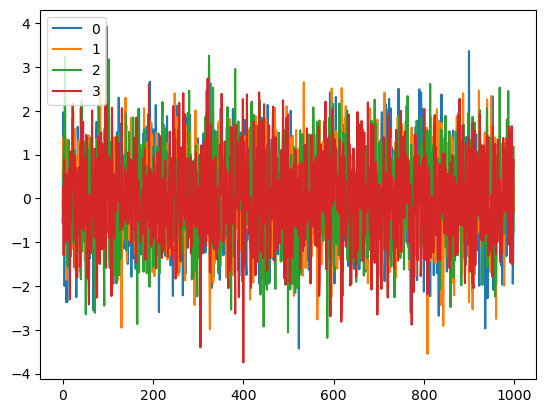

In [24]:
# 表示。所々にトビが存在
dframe.plot()

In [26]:
# 最初の列
col = dframe[0]
# 絶対値が3より大きい値を表示
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [28]:
# any:どこかの列 dframeが絶対値3より大きい値があるデータを取得
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [30]:
# データの符号を表示
np.sign(dframe)

,0,1,2,3
0,-1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,1.0
4,-1.0,-1.0,1.0,-1.0
...,...,...,...,...
995,1.0,1.0,-1.0,1.0
996,-1.0,-1.0,-1.0,-1.0
997,-1.0,1.0,1.0,1.0
998,-1.0,-1.0,-1.0,-1.0


In [32]:
# 絶対値の上限が3になるようにする。np.signでとれる符号±1 * 3 = ±3を条件合致するデータに対して代入する
dframe[np.abs(dframe)>3] = np.sign(dframe) *3
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


<AxesSubplot:>

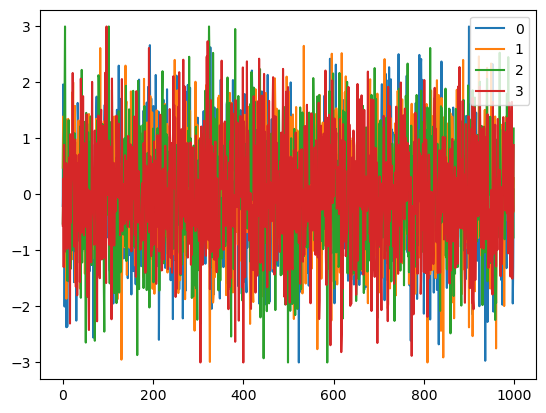

In [33]:
# 上下限を制限したパターンで再プロット　±3でデータが切れていることが確認できる
dframe.plot()

# Permutation

permutation : 順列

pandaではデータの順番をバラバラにする処理を指す

In [2]:
import numpy as np
from pandas import DataFrame

In [7]:
dframe = DataFrame(np.arange(4 * 4).reshape((4, 4)))
# permutationで順番をバラバラにする 実行毎に変化する
blender = np.random.permutation(4)

blender

array([2, 3, 1, 0])

In [8]:
# 確認用にnumpy行列として取得
dframe.take(blender)

,0,1,2,3
2,8,9,10,11
3,12,13,14,15
1,4,5,6,7
0,0,1,2,3


In [12]:
# データの取り出し -> もとに戻す場合の方法

# 箱の中に、A,B,C を格納
box = np.array(['A','B','C'])
# ランダムにビー玉を取り出す操作を10回行う。実行前に結果が変わる形になる
shaker = np.random.randint(0, len(box), size=10)
shaker

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 2])

In [13]:
# ABCの形で表示する
hand_grabs = box.take(shaker)
hand_grabs

array(['B', 'B', 'A', 'B', 'A', 'B', 'B', 'B', 'A', 'C'], dtype='<U1')